<a href="https://colab.research.google.com/github/HydrOpOtesJA99/A.I-learning-CNN-analysis/blob/main/12_Lenet_5_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12_Lenet_5_실습

In [2]:
import tensorflow as tf
import pandas as pd

## MNIST

### 1) 데이터를 준비한다.

In [3]:
# 데이터의 준비

(독립, 종속), _ = tf.keras.datasets.mnist.load_data()
독립 = 독립.reshape(60000, 28, 28, 1)
종속 = pd.get_dummies(종속)
print (독립.shape, 종속.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (60000, 10)


### 2) 모델을 구성한다.

In [15]:
# 모델의 구성

X = tf.keras.layers.Input(shape=[28, 28, 1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)
# padding; Convolution layer의 결과인 특징맵의 사이즈가 입력이미지와 동일한 크기의 이미지로 출력이 된다.
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation ='swish')(H)
H = tf.keras.layers.Dense(84, activation ='swish')(H) 
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [22]:
# 모델의 확인

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 400)               0   

### 3) 모델을 학습시킨다.

In [26]:
# 모델의 학습

model.fit(독립, 종속, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0528 - accuracy: 0.9895
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0587 - accuracy: 0.9893
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0582 - accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0609 - accuracy: 0.9893
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0623 - accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0576 - accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0663 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0614 - accuracy: 0.9904
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0668 - accuracy: 0.9902
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.055

### 4) 모델을 이용한다.

In [28]:
# 모델의 이용

pred = model.predict(독립[0:5])
pd.DataFrame(pred).round(2) # DataFrame의 형태로 변형해 출력, round(2) -> 소수점 둘째자리까지 출력

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
# 정답확인

종속[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


## Cifar 10

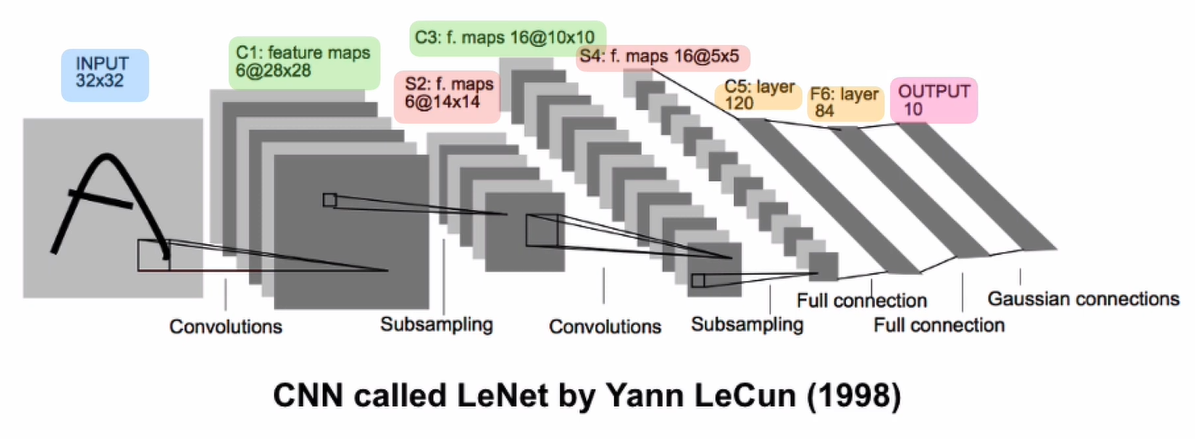

### 1) 데이터를 준비한다.

In [33]:
# 데이터 준비

(독립, 종속), _ = tf.keras.datasets.cifar10.load_data()
print(독립.shape, 종속.shape) 
# 종속변수 (50000, 1)의 원핫인 코딩이 필요

종속 = pd.get_dummies(종속.reshape(50000)) 
# 종속변수 2차원(50000,1)의 형태가 표의 형태가 아니므로 getdummies로 원핫인코딩이 안된다.
# (MNIST의 경우에는 표 형태였기 때문에 가능했다)
# 따라서 1차원 형태(50000)의 형태로 reshape를 해줘야 한다

print(독립.shape, 종속.shape)

(50000, 32, 32, 3) (50000, 1)
(50000, 32, 32, 3) (50000, 10)


### 2) 모델을 구성한다.

In [34]:
# 모델의 구성

X = tf.keras.layers.Input(shape=[32, 32, 3])

H = tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish')(X) # padding 제거
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation ='swish')(H)
H = tf.keras.layers.Dense(84, activation ='swish')(H) 
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [41]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 400)               0   

### 3) 모델을 학습시킨다.

In [53]:
# 모델의 학습


model.fit(독립, 종속, epochs=20, verbose=0)
model.fit(독립, 종속, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2788 - accuracy: 0.5832
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2730 - accuracy: 0.5855
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2734 - accuracy: 0.5850
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2690 - accuracy: 0.5855
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2841 - accuracy: 0.5812
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2545 - accuracy: 0.5863
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2910 - accuracy: 0.5780
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2921 - accuracy: 0.5802
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2776 - accuracy: 0.5817
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.431



*   조금 더 어려운 데이터 셋이어서 학습이 느리고, 정확가 낮다.



### 4) 모델을 이용한다

In [54]:
# 모델 예측

pred_cifar1 = model.predict(독립[0:5])
pd.DataFrame(pred_cifar1).round(2) # DataFrame의 형태로 변형해 출력, round(2) -> 소수점 둘째자리까지 출력

,0,1,2,3,4,5,6,7,8,9
0,0.01,0.00,0.18,0.24,0.16,0.15,0.18,0.06,0.01,0.01
1,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.92
2,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.83
3,0.00,0.00,0.01,0.14,0.66,0.09,0.04,0.05,0.00,0.00
4,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [46]:
# 정답 확인

종속[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0




*   1.0(100%)라고 확신은 못하지만 0.67(67%)~1.0(100%)의 높은 확률로 이미지를 예측하고 있음을 확인할 수 있었다. (계속 학습시키다 보니 값이 달라짐)

